In [90]:
import pandas as pd
from matplotlib import pyplot as plt
%matplotlib inline

In [91]:
sessions = pd.read_csv('sessions.csv')
sessions = sessions.fillna(0)

# reformat dates
sessions['date'] = pd.to_datetime(sessions.date)

In [92]:
sessions.columns

Index(['date', 'monkey', 'cycle', 'phase', 'loc', 'kg', 'hang', 'core',
       'block', 'arc', 'anta', 'legs', 'L-Sit', 'stable', 'max_full', 'total',
       'total6', '4', '5a', '5b', '5c', '6a', '6a+', '6b', '6b+', '6c', '6c+',
       '7a', '7a+', '4F2G', '3F2G', '16', '12', '15°', '35°', 'sloper',
       'pinch', '2F2G'],
      dtype='object')

In [93]:
sessions.head()

,date,monkey,cycle,phase,loc,kg,hang,core,block,arc,...,7a+,4F2G,3F2G,16,12,15°,35°,sloper,pinch,2F2G
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,0.0,0.0,0.0,...,1.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [94]:
boulder_4 = 4
boulder_5a = 8
boulder_5b = 9
boulder_5c = 10

boulder_6a = 20
boulder_6a_plus = 21
boulder_6b = 30

boulder_6b_plus = 40
boulder_6c = 60
boulder_6c_plus = 70

boulder_7a = 100
boulder_7a_plus = 130

scores_translator = {
    # climbing
    '4': boulder_4,   
    '5a': boulder_5a,
    '5b': boulder_5b,
    '5c': boulder_5c,
    '6a': boulder_6a,
    '6a+': boulder_6a_plus,
    '6b': boulder_6b,
    '6b+': boulder_6b_plus,
    '6c': boulder_6c,
    '6c+': boulder_6c_plus,
    '7a': boulder_7a,
    '7a+': boulder_7a_plus,
    
    # gymnastics
    'block': boulder_6a_plus / 5,
    'core': boulder_6a / 5,
    'anta': boulder_5c / 5,
    'legs': boulder_5c / 5,
    'L-Sit': boulder_6b,
    
    # ARC
    'arc': boulder_6b_plus / 5,
    
    # Hangboard for each 10 seconds
    '4F2G': boulder_5c / 10,
    '3F2G': boulder_6a / 10,
    '2F2G': boulder_6a_plus / 10,
    
    # crimp in mm
    '16': boulder_6a_plus / 10,
    '12': boulder_6b_plus / 10,
    
    # slopers
    'sloper': boulder_6a / 10,
    '15°': boulder_6a / 10,
    '35°': boulder_6b_plus / 10,
    
    'pinch': boulder_6b_plus / 10,
}

def calc_score(row):
    s = [row[key] * scores_translator[key] for key in scores_translator]
    return sum(s)



In [95]:
scores = sessions.apply(calc_score, axis=1)
sessions['scores'] = scores
sessions

,date,monkey,cycle,phase,loc,kg,hang,core,block,arc,...,4F2G,3F2G,16,12,15°,35°,sloper,pinch,2F2G,scores
0,2018-03-25,doripa,1,marathon,bb1,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1012.0
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0
2,2018-03-27,doripa,1,technique,bf,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,572.0
3,2018-03-29,doripa,1,4x4,bb2,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,450.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0
5,2018-03-31,doripa,1,project,bf,78.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,634.5
6,2018-02-04,doripa,1,project,bb1,78.0,210.0,10.0,0.0,0.0,...,30.0,30.0,30.0,30.0,30.0,0.0,0.0,30.0,30.0,1379.5
7,2018-02-04,sunshine,1,project,home,59.0,252.0,0.0,0.0,0.0,...,84.0,42.0,84.0,0.0,42.0,0.0,0.0,0.0,0.0,428.4
8,2018-04-04,doripa,1,project,bf,78.0,0.0,30.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,913.0
9,2018-06-04,sunshine,1,project,home,59.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [96]:
doripa = sessions[sessions.monkey == 'doripa']
sunshine_sessions = sessions[sessions.monkey == 'sunshine']

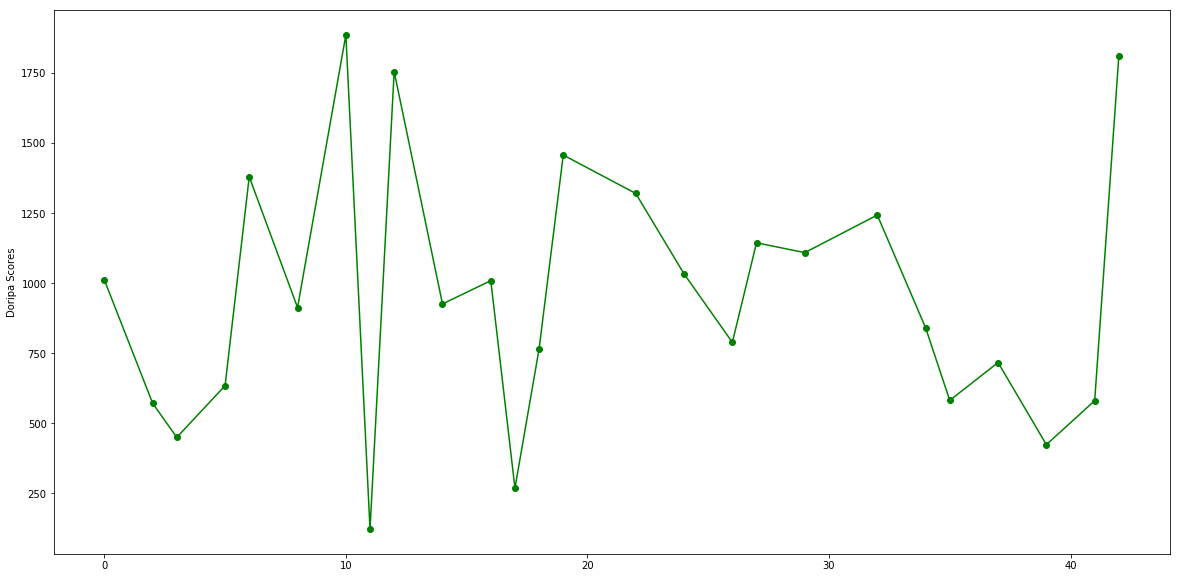

In [97]:
plt.figure(figsize=(20,10))
plt.plot(doripa.scores, marker='o', color='green')
plt.ylabel('Doripa Scores')
plt.show()

In [98]:
sunshine_sessions

,date,monkey,cycle,phase,loc,kg,hang,core,block,arc,...,4F2G,3F2G,16,12,15°,35°,sloper,pinch,2F2G,scores
1,2018-03-25,sunshine,1,marathon,bb1,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,556.0
4,2018-03-29,sunshine,1,4x4,bb2,60.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,194.0
7,2018-02-04,sunshine,1,project,home,59.0,252.0,0.0,0.0,0.0,...,84.0,42.0,84.0,0.0,42.0,0.0,0.0,0.0,0.0,428.4
9,2018-06-04,sunshine,1,project,home,59.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,2018-08-04,sunshine,1,project,home,59.0,252.0,20.0,15.0,9.0,...,84.0,42.0,84.0,0.0,42.0,0.0,0.0,0.0,0.0,763.4
15,2018-11-04,sunshine,1,project,home,59.0,252.0,0.0,0.0,0.0,...,84.0,42.0,84.0,0.0,42.0,0.0,0.0,0.0,0.0,428.4
20,2018-04-28,sunshine,2,base,bb1,59.0,0.0,36.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,278.0
21,2018-01-05,sunshine,2,base,bf,59.0,0.0,12.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,225.0
23,2018-03-05,sunshine,2,base,bb2,59.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,335.0
25,2018-06-05,sunshine,2,base,bb2,59.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,212.0


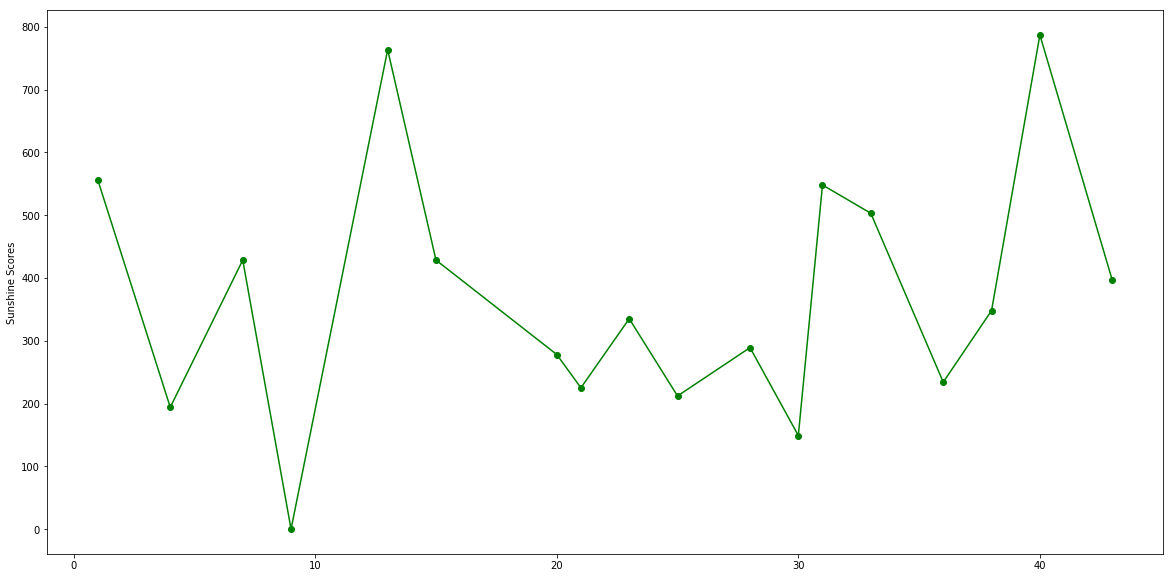

In [99]:
plt.figure(figsize=(20,10))
plt.plot(sunshine_sessions.scores,  marker='o', color='green')
plt.ylabel('Sunshine Scores')
plt.show()

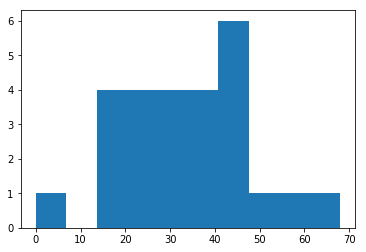

In [100]:
plt.hist(no_arcing['total'])
plt.show()

In [101]:
doripa.corr()

,cycle,kg,hang,core,block,arc,anta,legs,L-Sit,total,...,4F2G,3F2G,16,12,15°,35°,sloper,pinch,2F2G,scores
cycle,1.000000,-0.725212,0.230541,-0.022320,0.080388,0.185164,-0.375483,0.185164,-0.258114,0.062953,...,0.075008,0.144127,0.285404,0.070138,0.266368,0.316682,NaN,-0.148608,-0.216025,0.084052
kg,-0.725212,1.000000,-0.247613,0.152654,-0.075285,-0.212036,0.345144,0.156664,0.325111,0.127171,...,-0.074718,-0.088200,-0.283064,-0.153472,-0.375290,-0.270681,NaN,0.282902,0.156664,0.075941
hang,0.230541,-0.247613,1.000000,0.386170,0.343907,0.310098,0.323733,-0.153045,0.011402,0.133280,...,0.882109,0.928807,0.913000,0.256199,0.837069,0.377708,NaN,0.385734,0.252205,0.682235
core,-0.022320,0.152654,0.386170,1.000000,0.686430,0.681131,0.368083,-0.110646,0.488523,-0.071882,...,0.294248,0.420218,0.395951,-0.090897,0.111368,0.369355,NaN,0.403882,0.021317,0.619948
block,0.080388,-0.075285,0.343907,0.686430,1.000000,0.840501,0.187813,0.118087,0.473462,0.042606,...,0.204609,0.328132,0.330085,-0.085250,0.111387,0.472233,NaN,0.213240,-0.062517,0.520999
arc,0.185164,-0.212036,0.310098,0.681131,0.840501,1.000000,-0.088123,-0.040000,0.280717,-0.163888,...,0.164351,0.254184,0.381732,-0.054545,0.094904,0.598597,NaN,-0.072232,-0.040000,0.379869
anta,-0.375483,0.345144,0.323733,0.368083,0.187813,-0.088123,1.000000,-0.088123,0.227970,0.463399,...,0.588091,0.440386,0.260362,-0.120168,0.145177,-0.134017,NaN,0.342375,-0.088123,0.570688
legs,0.185164,0.156664,-0.153045,-0.110646,0.118087,-0.040000,-0.088123,1.000000,0.480680,0.125244,...,-0.136574,-0.143936,-0.129867,-0.054545,-0.117811,-0.068411,NaN,-0.072232,-0.040000,0.036013
L-Sit,-0.258114,0.325111,0.011402,0.488523,0.473462,0.280717,0.227970,0.480680,1.000000,-0.135412,...,-0.059862,0.030325,-0.059146,0.019227,-0.105709,0.052614,NaN,0.266189,0.280717,0.377265
total,0.062953,0.127171,0.133280,-0.071882,0.042606,-0.163888,0.463399,0.125244,-0.135412,1.000000,...,0.427835,0.315922,0.041689,-0.064132,-0.075684,-0.068587,NaN,0.176129,-0.044621,0.524031


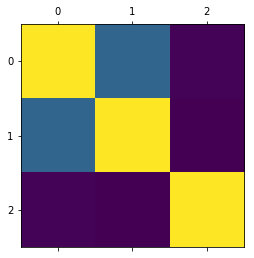

In [102]:
plt.matshow(doripa[['total', 'total6', 'scores']].corr());

In [103]:
doripa[['total', 'total6', 'scores']].corr()

,total,total6,scores
total,1.000000,0.676180,0.524031
total6,0.676180,1.000000,0.519738
scores,0.524031,0.519738,1.000000


In [104]:
doripa['total'].corr(doripa['total6'])

0.67617976223060083

In [105]:
doripa['total'].corr(doripa['scores'])

0.52403141369558981

In [106]:
doripa['scores'].corr(doripa['total6'])

0.51973829192248333

In [107]:
sunshine_sessions.corr()['scores']

cycle    -0.085834
kg        0.007454
hang      0.630817
core      0.081931
block     0.476759
arc       0.476759
anta     -0.154402
legs     -0.043459
L-Sit     0.458373
total     0.246167
total6    0.262071
4        -0.097110
5a        0.251150
5b        0.250483
5c        0.261836
6a       -0.046728
6a+       0.300168
6b        0.349670
6b+       0.439618
6c        0.211470
6c+            NaN
7a       -0.214680
7a+            NaN
4F2G      0.551836
3F2G      0.567414
16        0.603080
12             NaN
15°       0.627744
35°       0.030615
sloper    0.215193
pinch          NaN
2F2G           NaN
scores    1.000000
Name: scores, dtype: float64

In [108]:
doripa.corr()['scores']

cycle     0.084052
kg        0.075941
hang      0.682235
core      0.619948
block     0.520999
arc       0.379869
anta      0.570688
legs      0.036013
L-Sit     0.377265
total     0.524031
total6    0.519738
4        -0.078800
5a        0.129269
5b        0.154112
5c        0.325175
6a        0.360543
6a+       0.295642
6b        0.408460
6b+       0.429321
6c        0.171911
6c+       0.344155
7a        0.308037
7a+      -0.050641
4F2G      0.748157
3F2G      0.719300
16        0.535693
12        0.203015
15°       0.315628
35°       0.392184
sloper         NaN
pinch     0.461928
2F2G      0.189108
scores    1.000000
Name: scores, dtype: float64